In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import pydataset as data

import wrangle
from env import get_db_url

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


In [4]:
df.shape

(2140235, 7)

In [5]:
df = wrangle.remove_stat_outliers(df, 2, ['bed_rms', 'bath_rms', 'sq_ft', 'tax_value', 'yr_blt', 'taxamount'])

In [6]:
df.shape

(1924022, 7)

In [7]:
train, validate, test = wrangle.split_data(df)

In [8]:
train.shape

(1077451, 7)

In [9]:
train_half = df.sample(frac = 0.5)

In [10]:
train_half.shape

(962011, 7)

## 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [31]:
#def plot_variable_pairs(df):
def plot_variable_pairs(df, target):
    cols = df.columns.to_list()
    cols.remove(target)
    
    for col in cols:
        sns.lmplot(data= df, x=col, y=target, line_kws={'color':'red'})
    
    plt.show()

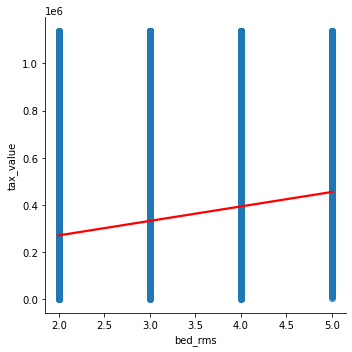

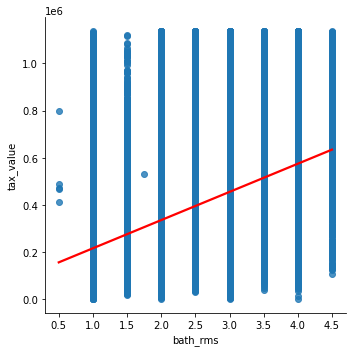

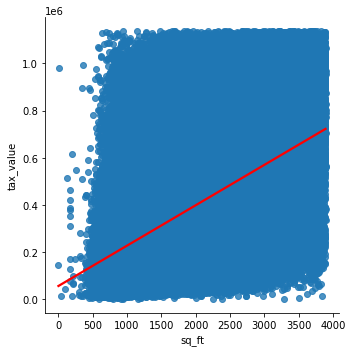

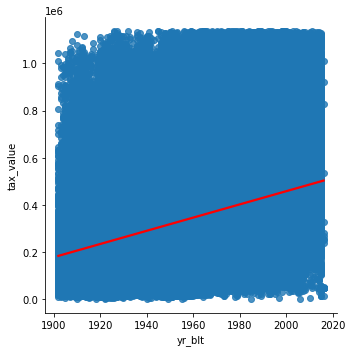

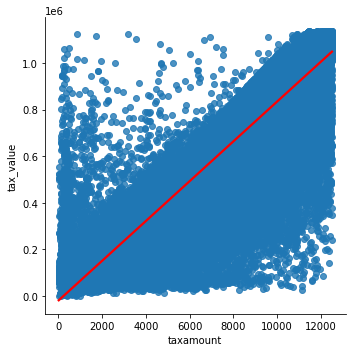

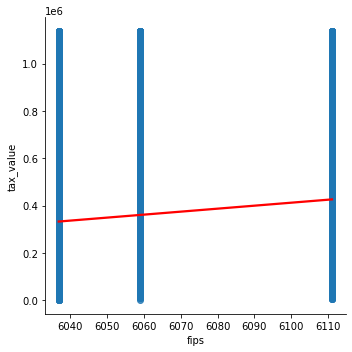

In [32]:
plot_variable_pairs(train_half, 'tax_value')

In [12]:
np.triu(train_half)

array([[3.00000e+00, 2.00000e+00, 1.64200e+03, ..., 1.95500e+03,
        8.82690e+02, 6.03700e+03],
       [0.00000e+00, 2.00000e+00, 1.44900e+03, ..., 1.93900e+03,
        2.36874e+03, 6.03700e+03],
       [0.00000e+00, 0.00000e+00, 2.30500e+03, ..., 1.96700e+03,
        6.87620e+03, 6.03700e+03],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

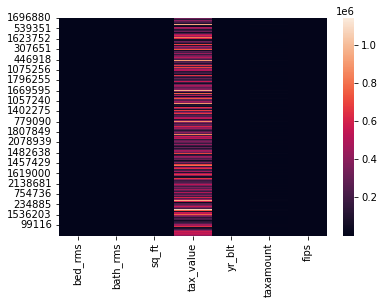

In [13]:
sns.heatmap(train_half, mask=(np.triu(train_half)))
plt.show()

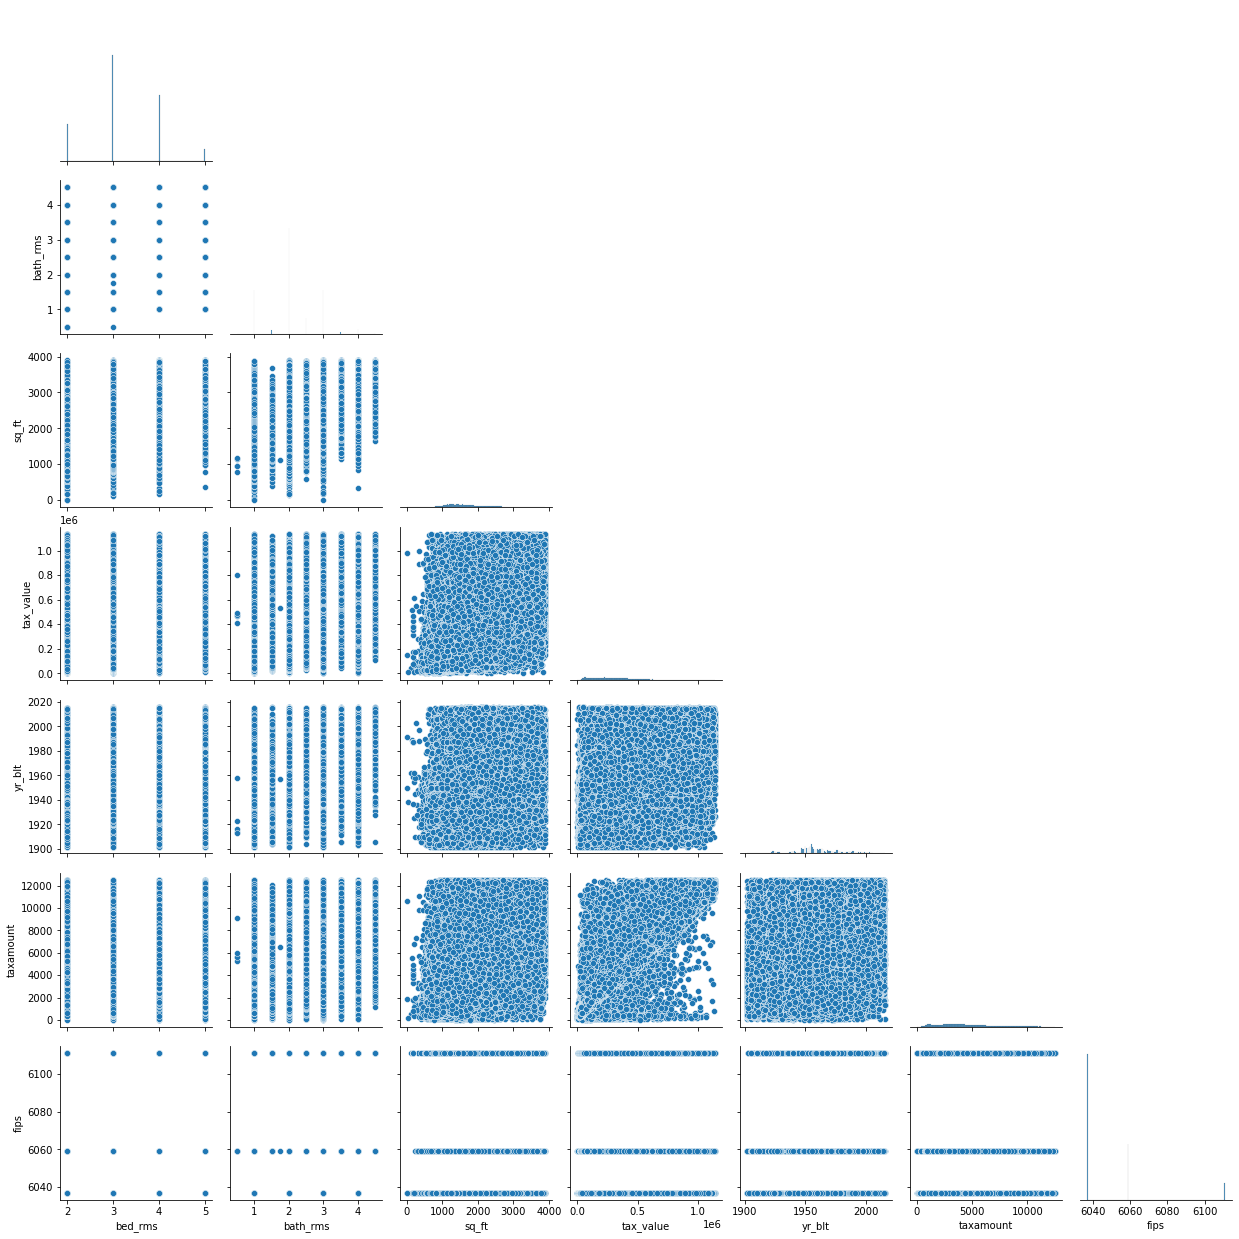

In [14]:
sns.pairplot(data= train_half, corner = True)

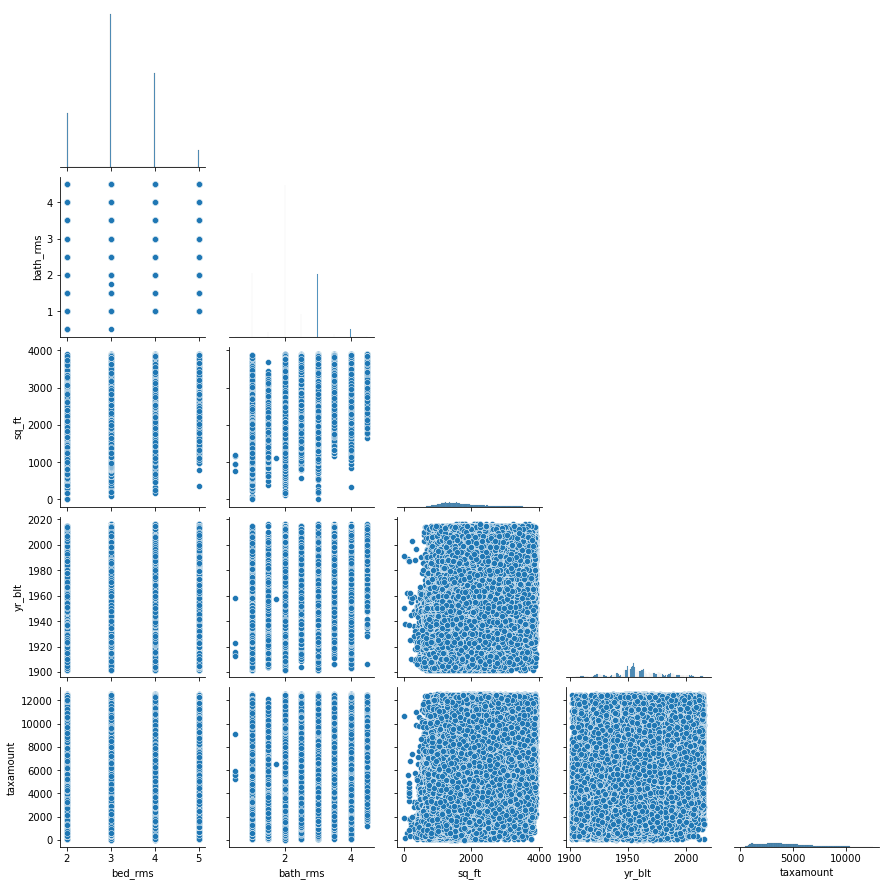

In [15]:
sns.pairplot(data= train_half.drop(columns = ['tax_value', 'fips']), corner = True)

In [16]:
train_half.head()

,bed_rms,bath_rms,sq_ft,tax_value,yr_blt,taxamount,fips
1696880,3.0,2.0,1642.0,164875.0,1955.0,882.69,6037.0
46135,2.0,2.0,1449.0,180053.0,1939.0,2368.74,6037.0
529362,4.0,2.0,2305.0,560684.0,1967.0,6876.20,6037.0
609962,4.0,2.0,2074.0,634530.0,1977.0,7521.69,6037.0
1383750,4.0,3.0,1744.0,512500.0,1947.0,6088.77,6037.0


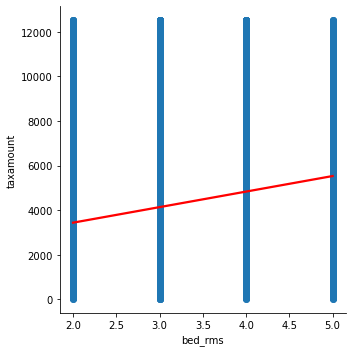

In [17]:
sns.lmplot(data=train_half, x='bed_rms', y='taxamount',
           line_kws={'color':'red'})
plt.show()

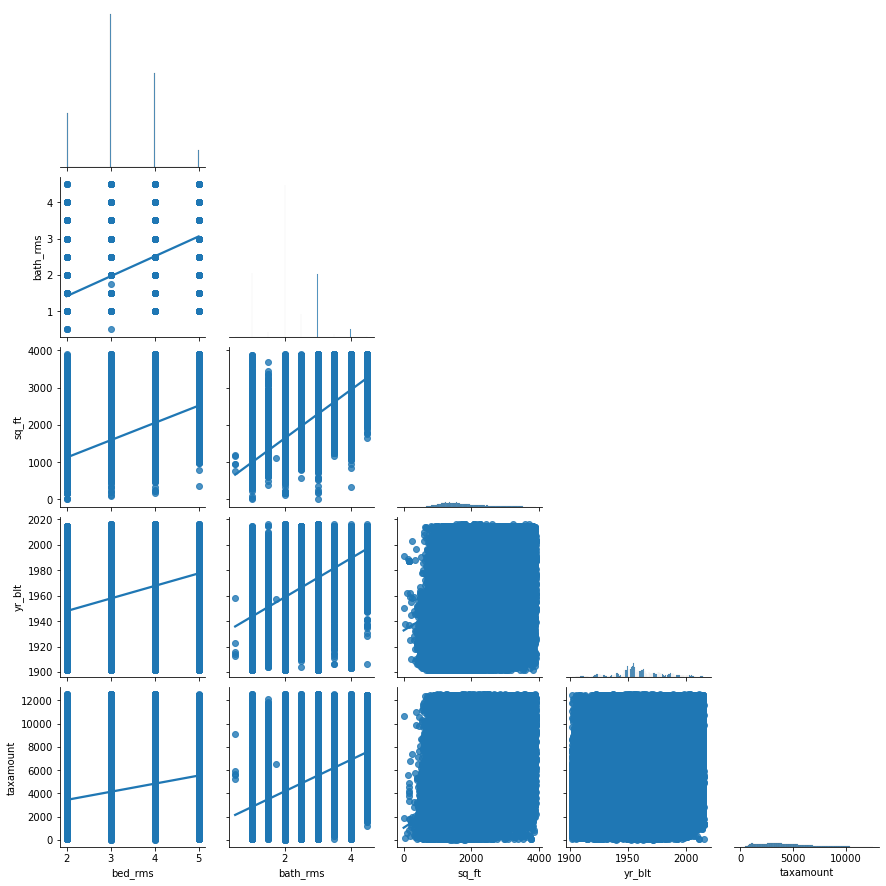

In [18]:
sns.pairplot(data= train_half.drop(columns = ['tax_value', 'fips']),kind = 'reg', corner = True)

In [23]:
def plot_variable_pairs(df, target):
    cols = df.columns.to_list()
    cols.remove(target)
    
    for col in cols:
        sns.lmplot(data= df, x=col, y=target, line_kws={'color':'red'})
    
    plt.show()

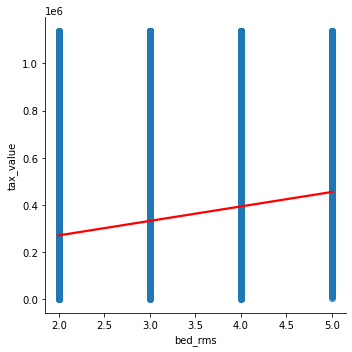

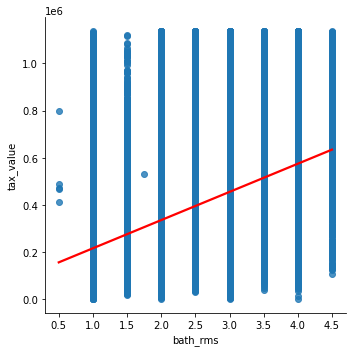

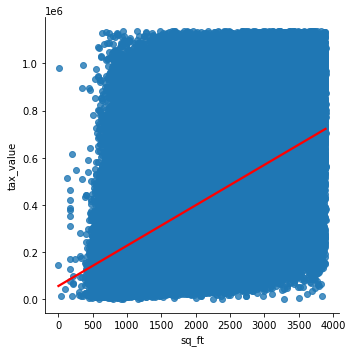

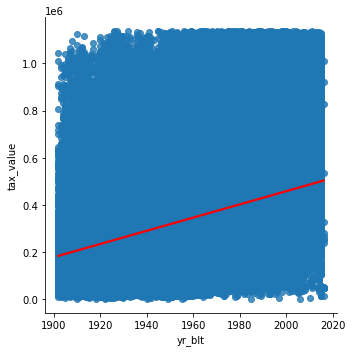

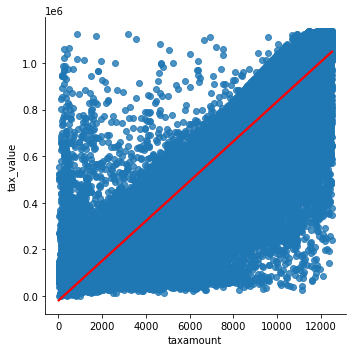

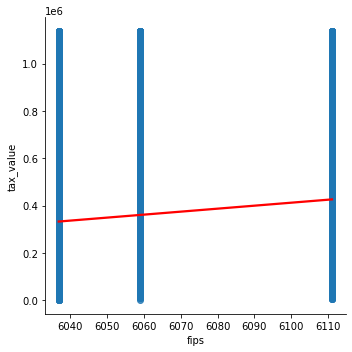

In [25]:
plot_variable_pairs(train_half, 'tax_value')

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [ ]:
cat_vars_list = ['bed_rms', 'bath_rms', 'fips']
cont_vars_list = ['taxamount', ]

In [93]:
def plot_categorical_and_continuous_vars(df, cat_vars_list, cont_vars_list):
    
    for col in cat_vars:
        for col2 in cont_vars:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1)
            sns.violinplot(data=df, x=col, y=col2, ax=ax2)
            sns.barplot(data=df, x=col, y=col2, ax=ax3)
            plt.show()

In [ ]:
plot_categorical_and_continuous_vars(train_half, )